In [1]:
import xlwings as xw
from shapely.wkt import loads
import pandas as pd
from xlwings.pro.reports.filters import columns


In [2]:
zone_name = 'Зона 1'
current_point_name = '19а'

In [26]:
sheet = xw.sheets.active
zone_df = sheet.range('A1').expand().options(pd.DataFrame, header=1, index=False).value
zone_df['Геометрия'] = zone_df['Геометрия'].apply(loads)
zone_df['Позиция номера'] = zone_df['Позиция номера'].apply(loads)

current_point = zone_df['Позиция номера'][zone_df['Исх.номер'] == current_point_name].iloc[0]
points = zone_df['Позиция номера'].tolist()
visited = []
while len(visited) < len(points):
    distances = [(idx, current_point.distance(pt)) for idx, pt in enumerate(points) if idx not in visited]
    nearest_idx = min(distances, key=lambda x: x[1])[0]
    visited.append(nearest_idx)
    current_point = points[nearest_idx]
zone_df['Очередь'] = [visited.index(idx) + 1 for idx in range(len(points))]
    
zone_df

,Индекс,Исх.номер,Номер,Наименование,Количество,Высота,Толщина,Состояние,Кустарник,Позиция номера,Геометрия,Очередь
0,0,3.0,209.0,Ольха серая,1.0,5.0,4.0,Хорошее,0.0,POINT (3108.838205298518 1707.285109871409),POINT (3108.838205298518 1707.285109871409),9
1,1,4.0,208.0,Ольха серая,1.0,5.0,5.0,Хорошее,0.0,POINT (3114.150988844972 1707.4695572873902),POINT (3114.150988844972 1707.4695572873902),8
2,2,5.0,205.0,береза,6 стволов,"4,4,4,4,4,4","5,5,5,5,5,5",Хорошее,0.0,POINT (3115.690642463274 1707.5867820573599),POINT (3115.690642463274 1707.5867820573599),5
3,3,6.0,206.0,Ива ломкая,54 ствола,"5х14, 4х30, 3х8,2,1","7х3,4х11, 2х40",Хорошее,0.0,POINT (3115.1004453425708 1706.18062074892),POINT (3115.1004453425708 1706.18062074892),6
4,4,7.0,207.0,береза,1.0,2.5,0.05,Хорошее,0.0,POINT (3114.699609216242 1705.0905155704238),POINT (3114.699609216242 1705.0905155704238),7
5,5,8.0,210.0,береза,41.5 м.кв.,1.5,0.05,Хорошее,0.0,POINT (3108.9551269498993 1702.8311075061063),POLYGON ((3105.4447596941113 1698.807471550078...,10
6,6,9.0,211.0,ольха,41.5 м.кв.,2.0,0.06,Хорошее,0.0,POINT (3108.9551269498993 1702.8311075061063),POLYGON ((3105.4447596941113 1698.807471550078...,11
7,7,15.0,212.0,Алыча,17.0 м.п.,2.0,0.07,Хорошее,0.0,POINT (3104.0287726776705 1706.0783789373688),LINESTRING (3097.678803422473 1700.41015578969...,12
8,8,16.0,218.0,Алыча,4.8 м.п.,3.0,0.12,Хорошее,0.0,POINT (3097.720077396069 1708.4442524397011),LINESTRING (3099.2754038714006 1706.8144261618...,18
9,9,19а,201.0,Берёза пушистая,1.0,0.4,0.01,Хорошее,0.0,POINT (3115.8767179014208 1710.2258575299381),POINT (3115.8767179014208 1710.2258575299381),1


In [27]:
start_number = 200

zone_df['Номер'] = zone_df['Очередь'].apply(lambda x: start_number + x - 1)

zone_df

,Индекс,Исх.номер,Номер,Наименование,Количество,Высота,Толщина,Состояние,Кустарник,Позиция номера,Геометрия,Очередь
0,0,3.0,208,Ольха серая,1.0,5.0,4.0,Хорошее,0.0,POINT (3108.838205298518 1707.285109871409),POINT (3108.838205298518 1707.285109871409),9
1,1,4.0,207,Ольха серая,1.0,5.0,5.0,Хорошее,0.0,POINT (3114.150988844972 1707.4695572873902),POINT (3114.150988844972 1707.4695572873902),8
2,2,5.0,204,береза,6 стволов,"4,4,4,4,4,4","5,5,5,5,5,5",Хорошее,0.0,POINT (3115.690642463274 1707.5867820573599),POINT (3115.690642463274 1707.5867820573599),5
3,3,6.0,205,Ива ломкая,54 ствола,"5х14, 4х30, 3х8,2,1","7х3,4х11, 2х40",Хорошее,0.0,POINT (3115.1004453425708 1706.18062074892),POINT (3115.1004453425708 1706.18062074892),6
4,4,7.0,206,береза,1.0,2.5,0.05,Хорошее,0.0,POINT (3114.699609216242 1705.0905155704238),POINT (3114.699609216242 1705.0905155704238),7
5,5,8.0,209,береза,41.5 м.кв.,1.5,0.05,Хорошее,0.0,POINT (3108.9551269498993 1702.8311075061063),POLYGON ((3105.4447596941113 1698.807471550078...,10
6,6,9.0,210,ольха,41.5 м.кв.,2.0,0.06,Хорошее,0.0,POINT (3108.9551269498993 1702.8311075061063),POLYGON ((3105.4447596941113 1698.807471550078...,11
7,7,15.0,211,Алыча,17.0 м.п.,2.0,0.07,Хорошее,0.0,POINT (3104.0287726776705 1706.0783789373688),LINESTRING (3097.678803422473 1700.41015578969...,12
8,8,16.0,217,Алыча,4.8 м.п.,3.0,0.12,Хорошее,0.0,POINT (3097.720077396069 1708.4442524397011),LINESTRING (3099.2754038714006 1706.8144261618...,18
9,9,19а,200,Берёза пушистая,1.0,0.4,0.01,Хорошее,0.0,POINT (3115.8767179014208 1710.2258575299381),POINT (3115.8767179014208 1710.2258575299381),1


In [12]:
zone_df.drop(columns=['Очередь'])

,Индекс,Исх.номер,Номер,Наименование,Количество,Высота,Толщина,Состояние,Кустарник,Позиция номера,Геометрия
0,0,3,209,Ольха серая,1,5.0,4.0,Хорошее,0.0,POINT (3108.838205298518 1707.285109871409),POINT (3108.838205298518 1707.285109871409)
1,1,4,208,Ольха серая,1,5.0,5.0,Хорошее,0.0,POINT (3114.150988844972 1707.4695572873902),POINT (3114.150988844972 1707.4695572873902)
2,2,5,205,береза,6 стволов,"4,4,4,4,4,4","5,5,5,5,5,5",Хорошее,0.0,POINT (3115.690642463274 1707.5867820573599),POINT (3115.690642463274 1707.5867820573599)
3,3,6,206,Ива ломкая,54 ствола,"5х14, 4х30, 3х8,2,1","7х3,4х11, 2х40",Хорошее,0.0,POINT (3115.1004453425708 1706.18062074892),POINT (3115.1004453425708 1706.18062074892)
4,4,7,207,береза,1,2.5,0.05,Хорошее,0.0,POINT (3114.699609216242 1705.0905155704238),POINT (3114.699609216242 1705.0905155704238)
5,5,8,210,береза,41.5 м.кв.,1.5,0.05,Хорошее,0.0,POINT (3108.9551269498993 1702.8311075061063),POLYGON ((3105.4447596941113 1698.807471550078...
6,6,9,211,ольха,41.5 м.кв.,2.0,0.06,Хорошее,0.0,POINT (3108.9551269498993 1702.8311075061063),POLYGON ((3105.4447596941113 1698.807471550078...
7,7,15,212,Алыча,17.0 м.п.,2.0,0.07,Хорошее,0.0,POINT (3104.0287726776705 1706.0783789373688),LINESTRING (3097.678803422473 1700.41015578969...
8,8,16,218,Алыча,4.8 м.п.,3.0,0.12,Хорошее,0.0,POINT (3097.720077396069 1708.4442524397011),LINESTRING (3099.2754038714006 1706.8144261618...
9,9,19а,201,Берёза пушистая,1,0.4,0.01,Хорошее,0.0,POINT (3115.8767179014208 1710.2258575299381),POINT (3115.8767179014208 1710.2258575299381)


In [7]:
zone_df = zone_df.sort_values(by=['Очередь'])

zone_df

,Индекс,Исх.номер,Номер,Наименование,Количество,Высота,Толщина,Состояние,Кустарник,Позиция номера,Геометрия,Очередь
9,9,19а,None,Берёза пушистая,1,0.4,0.01,Хорошее,0.0,POINT (3115.8767179014208 1710.2258575299381),POINT (3115.8767179014208 1710.2258575299381),1
10,10,19б,None,Берёза пушистая,1,0.4,0.01,Хорошее,0.0,POINT (3115.8767179014208 1710.2258575299381),POINT (3115.8767179014208 1710.2258575299381),2
11,11,19в,None,Берёза пушистая,1,0.4,0.01,Хорошее,0.0,POINT (3115.8767179014208 1710.2258575299381),POINT (3115.8767179014208 1710.2258575299381),3
12,12,19 г,None,Берёза пушистая,1,0.4,0.01,Хорошее,0.0,POINT (3115.8767179014208 1710.2258575299381),POINT (3115.8767179014208 1710.2258575299381),4
2,2,5,None,береза,6 стволов,"4,4,4,4,4,4","5,5,5,5,5,5",Хорошее,0.0,POINT (3115.690642463274 1707.5867820573599),POINT (3115.690642463274 1707.5867820573599),5
3,3,6,None,Ива ломкая,54 ствола,"5х14, 4х30, 3х8,2,1","7х3,4х11, 2х40",Хорошее,0.0,POINT (3115.1004453425708 1706.18062074892),POINT (3115.1004453425708 1706.18062074892),6
4,4,7,None,береза,1,2.5,0.05,Хорошее,0.0,POINT (3114.699609216242 1705.0905155704238),POINT (3114.699609216242 1705.0905155704238),7
1,1,4,None,Ольха серая,1,5.0,5.0,Хорошее,0.0,POINT (3114.150988844972 1707.4695572873902),POINT (3114.150988844972 1707.4695572873902),8
0,0,3,None,Ольха серая,1,5.0,4.0,Хорошее,0.0,POINT (3108.838205298518 1707.285109871409),POINT (3108.838205298518 1707.285109871409),9
5,5,8,None,береза,41.5 м.кв.,1.5,0.05,Хорошее,0.0,POINT (3108.9551269498993 1702.8311075061063),POLYGON ((3105.4447596941113 1698.807471550078...,10


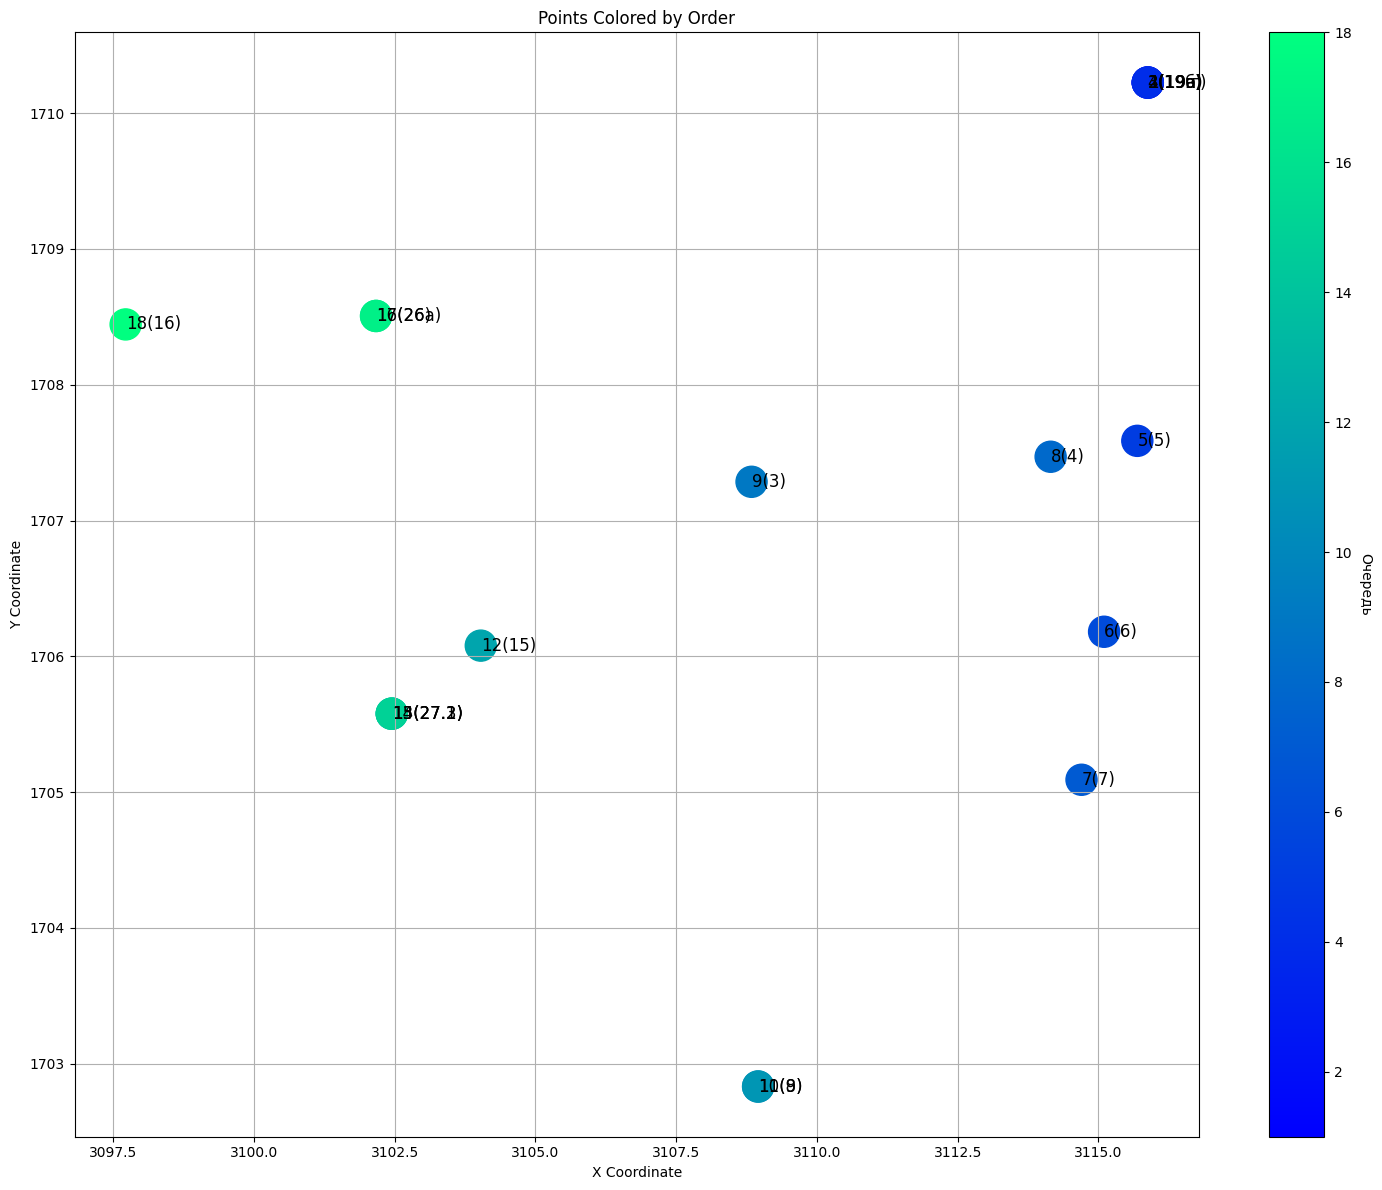

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_points(df):
    x_coords = [point.x for point in df['Позиция номера']]
    y_coords = [point.y for point in df['Позиция номера']]
    orders = df['Очередь']
    numbers = df['Исх.номер']
    
    cmap = mpl.colormaps['winter']
    norm = plt.Normalize(vmin=orders.min(), vmax=orders.max())
    
    plt.figure(figsize=(15, 12))
    scatter = plt.scatter(x_coords, y_coords, c=orders, s=500, cmap=cmap, norm=norm)
    for i, (x, y, order, number) in enumerate(zip(x_coords, y_coords, orders, numbers)):
        plt.text(x, y, f"{order}({number})", fontsize=12, ha='left', va='center', color='black')
    
    cbar = plt.colorbar(scatter, label='Очередь')
    cbar.ax.set_ylabel('Очередь', rotation=270, labelpad=15)
    
    plt.title('Points Colored by Order')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

plot_points(zone_df)

Разделять только если количество в штуках и если:
несколько состояний
часть - пни, часть - нет

разделить ведомость на orm там где соединенные номера